In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///F:/Bucharest_HousePriceDataset.csv")
df.head()

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
0,4,108.00,2,3,4,5,83000
1,1,41.00,1,8,1,1,39900
2,3,63.52,1,3,2,3,84900
3,1,33.00,3,10,5,1,45500
4,2,62.00,5,9,5,5,54900


In [3]:
df.shape

(3529, 7)

In [4]:
df.rename(columns={'Nr Camere':'Rooms', 'Suprafata':'Surface', 'Etaj':'Floor',
                   'Total Etaje': 'NumberOfFloors', 'Sector':'AreaLocation',
                   'Scor':'Rank', 'Pret':'Price'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms           3529 non-null   int64  
 1   Surface         3529 non-null   float64
 2   Floor           3529 non-null   int64  
 3   NumberOfFloors  3529 non-null   int64  
 4   AreaLocation    3529 non-null   int64  
 5   Rank            3529 non-null   int64  
 6   Price           3529 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 193.1 KB


In [6]:
df['AreaLocation']=df['AreaLocation'].astype('category')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,3529.0,2.464154,0.882514,1.0,2.0,2.0,3.0,9.0
Surface,3529.0,69.812454,29.086956,16.0,52.0,63.0,81.0,350.0
Floor,3529.0,3.089544,2.733418,-1.0,1.0,2.0,4.0,20.0
NumberOfFloors,3529.0,6.427317,3.156608,1.0,4.0,6.0,9.0,24.0
Rank,3529.0,3.098045,1.442990,1.0,2.0,4.0,4.0,5.0
Price,3529.0,97846.330689,62844.200384,19500.0,58400.0,78600.0,117500.0,495000.0


In [8]:
houses = df[df['NumberOfFloors']==0]
houses

,Rooms,Surface,Floor,NumberOfFloors,AreaLocation,Rank,Price


In [9]:
df[df['Floor'] > df['NumberOfFloors']]

,Rooms,Surface,Floor,NumberOfFloors,AreaLocation,Rank,Price


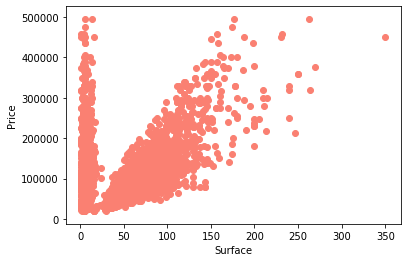

In [11]:
inspact=['NumberOfFloors', 'Surface']
for i in inspact:
    plt.scatter(df[i],df['Price'],color='salmon')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.grid()

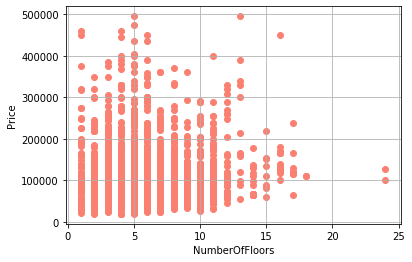

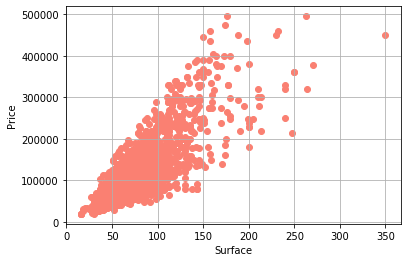

In [12]:
inspect = ['NumberOfFloors', 'Surface']
for c in inspect:
    plt.scatter(df[c], df['Price'], color='salmon')
    plt.xlabel(c)
    plt.ylabel('Price')
    plt.grid()
    plt.show()

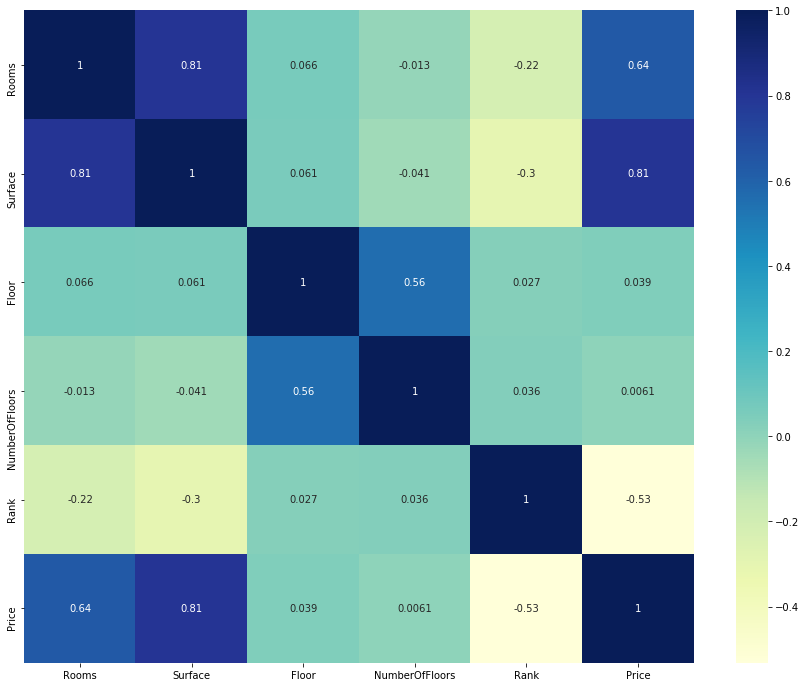

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [14]:
df

,Rooms,Surface,Floor,NumberOfFloors,AreaLocation,Rank,Price
0,4,108.00,2,3,4,5,83000
1,1,41.00,1,8,1,1,39900
2,3,63.52,1,3,2,3,84900
3,1,33.00,3,10,5,1,45500
4,2,62.00,5,9,5,5,54900
...,...,...,...,...,...,...,...
3524,3,102.00,2,5,1,1,189000
3525,4,96.00,1,3,3,2,200000
3526,1,35.00,1,3,4,5,47000
3527,2,60.00,6,7,1,2,89500


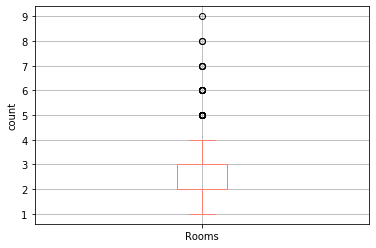

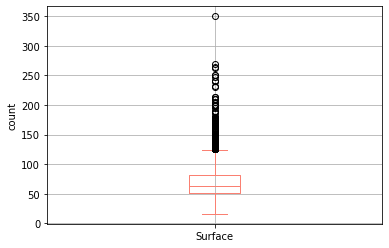

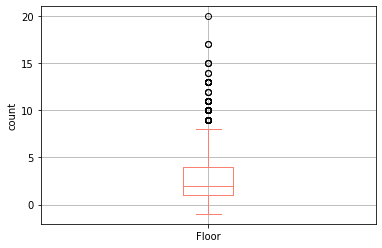

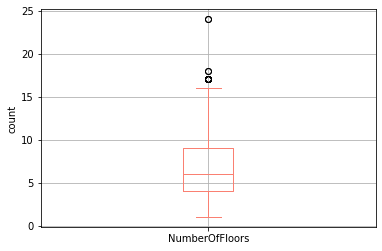

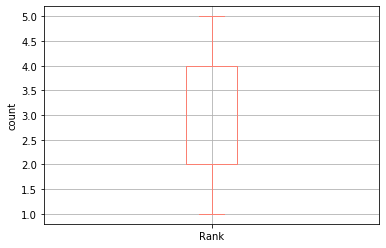

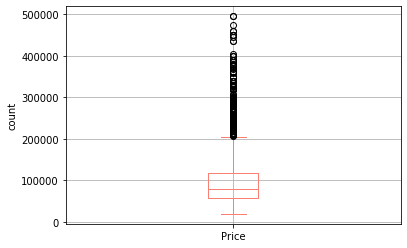

In [15]:
for c in df.columns[[0,1,2,3,5,6]]: # except 'category' dtype
    df[c].plot(kind='box', color = 'salmon')
    plt.ylabel('count')
    plt.grid()
    plt.show()

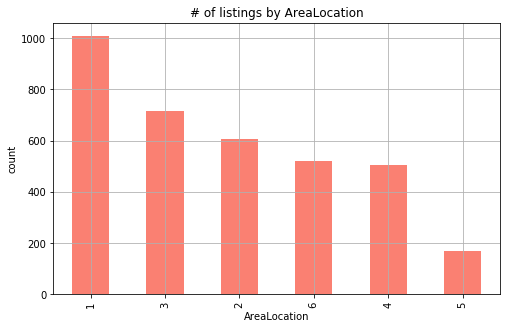

In [18]:
plt.figure(figsize=(8,5))
df['AreaLocation'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('AreaLocation')
plt.ylabel('count')
plt.title('# of listings by AreaLocation')
plt.grid()
plt.show()

In [19]:
def area_info(feature, aggregation):

    plt.figure(figsize=(8,5))
    if aggregation == 'sum':
        x = df.groupby('AreaLocation')[feature].sum()
        x.plot(kind='bar', color='salmon')
        plt.title('Sum of {} per AreaLocation'.format(feature))
        plt.ylabel('sum')
        plt.grid()
        plt.show()

    elif aggregation == 'mean':
        x = df.groupby('AreaLocation')[feature].mean()
        x.plot(kind='bar', color='salmon')
        plt.title('Mean {} per AreaLocation'.format(feature))
        plt.ylabel('mean')
        plt.grid()
        plt.show()

    elif aggregation == 'min':
        x = df.groupby('AreaLocation')[feature].min()
        x.plot(kind='bar', color='salmon')
        plt.title('Min {} per AreaLocation'.format(feature))
        plt.ylabel('min')
        plt.grid()
        plt.show()

    elif aggregation == 'max':
        x = df.groupby('AreaLocation')[feature].max()
        x.plot(kind='bar', color='salmon')
        plt.title('Sum of {} per AreaLocation'.format(feature))
        plt.ylabel('max')
        plt.grid()
        plt.show()

    else:
        print('You chose an incorrect feature or your aggregation is not correct')
        print('Please chose from the following features: Rooms, Surface, Floor, NumberOfFloors, Rank, Price.')
        print('Please choose from the following list of aggregations: sum, mean, min, max')

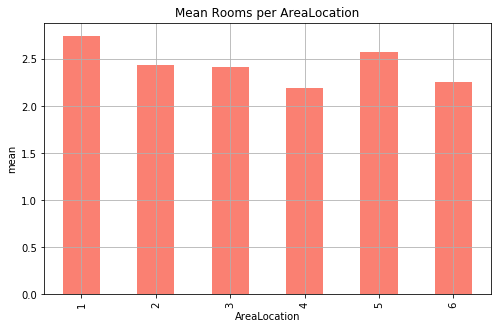

In [20]:
area_info('Rooms', 'mean')

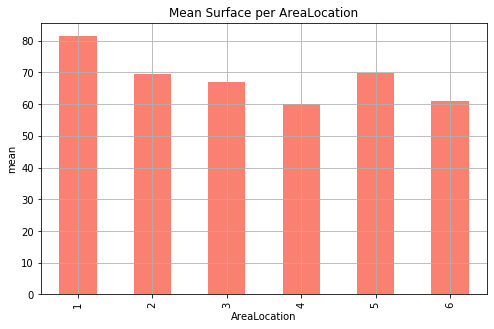

In [21]:
area_info('Surface', 'mean')

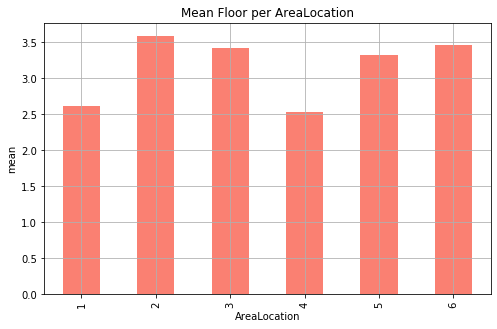

In [22]:
area_info('Floor', 'mean')

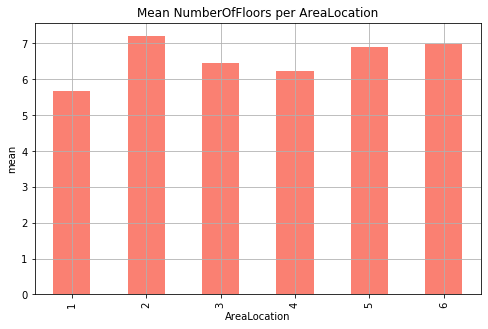

In [23]:
area_info('NumberOfFloors', 'mean')

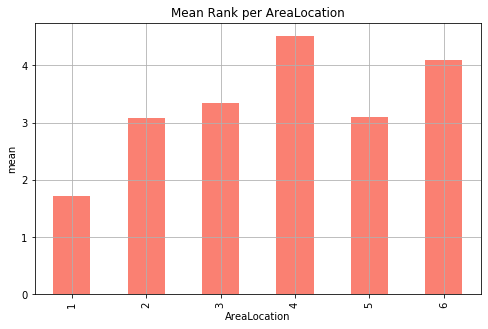

In [24]:
area_info('Rank', 'mean')

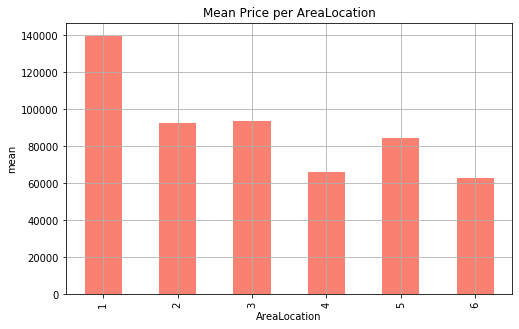

In [25]:
area_info('Price', 'mean')

In [26]:
encoded = pd.get_dummies(df['AreaLocation'], prefix='Area')
new_data = pd.concat([df, encoded], axis=1)
new_data.drop('AreaLocation', axis = 1, inplace = True)
print(new_data.shape)
new_data.head()

(3529, 12)


,Rooms,Surface,Floor,NumberOfFloors,Rank,Price,Area_1,Area_2,Area_3,Area_4,Area_5,Area_6
0,4,108.00,2,3,5,83000,0,0,0,1,0,0
1,1,41.00,1,8,1,39900,1,0,0,0,0,0
2,3,63.52,1,3,3,84900,0,1,0,0,0,0
3,1,33.00,3,10,1,45500,0,0,0,0,1,0
4,2,62.00,5,9,5,54900,0,0,0,0,1,0


In [27]:
change = ['Area_1','Area_2','Area_3','Area_4','Area_5','Area_6']

for c in change:
    new_data[c] = new_data[c].astype('int64')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms           3529 non-null   int64  
 1   Surface         3529 non-null   float64
 2   Floor           3529 non-null   int64  
 3   NumberOfFloors  3529 non-null   int64  
 4   Rank            3529 non-null   int64  
 5   Price           3529 non-null   int64  
 6   Area_1          3529 non-null   int64  
 7   Area_2          3529 non-null   int64  
 8   Area_3          3529 non-null   int64  
 9   Area_4          3529 non-null   int64  
 10  Area_5          3529 non-null   int64  
 11  Area_6          3529 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 331.0 KB


In [28]:
target = new_data['Price'].values.reshape(-1,1)
features = new_data.drop('Price', axis = 1).values

print(features.shape, target.shape)

(3529, 11) (3529, 1)


In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [30]:
class Model:
  
  def __init__(self, model, test_size, features, target):
    self.model = model
    self.test_size = test_size
    self.features = features
    self.target = target

  

  def Fit(self):
    X_train, X_test, y_train, y_test = train_test_split(self.features, self.target, test_size = self.test_size, random_state = 123, shuffle = True)
    self.model.fit(X_train, y_train)
    preds = self.model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    acc = self.model.score(X_train, y_train)
    print("Root Mean Squared Error: {}".format(rmse))
    print('Model Accuracy: {}'.format(acc)) 

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge, SGDRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge, SGDRegressor
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [35]:
regressors = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), LassoLars(), BayesianRidge(), SGDRegressor()]

for r in regressors:
    print(r)
    selected = Model(r, 0.2, scaled_features, target)
    selected.Fit()
    print('\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root Mean Squared Error: 30801.48293709472
Model Accuracy: 0.7605058716314624


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Root Mean Squared Error: 30804.616547602225
Model Accuracy: 0.7605080028723492


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Root Mean Squared Error: 30801.64686750986
Model Accuracy: 0.7605081820603272


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Root Mean Squared Error: 34974.870353715
Model Accuracy: 0.708900153440333


LassoLars(alpha=1.0, copy_X=True, eps=2.220446